<a href="https://colab.research.google.com/github/felipecortesl-dotcom/Tareas/blob/main/Tarea6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coeficientes de P(x) (potencias descendentes):
   x^4: -0.000000000000
   x^3: 0.662429883901
   x^2: 0.000000000000
   x^1: -1.720104981965
   x^0: -0.000000000000

Polinomio aproximado:  P(x) ≈ -0.000000000 x^4 + 0.662429884 x^3 + 0.000000000 x^2 + -1.720104982 x + -0.000000000

||f - P||_∞ en la malla: 8.517997e+00


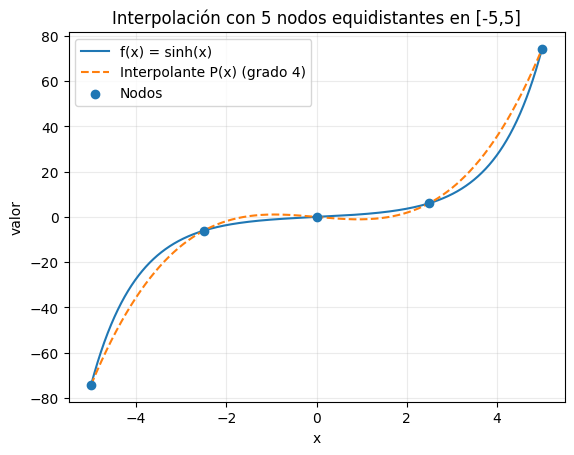

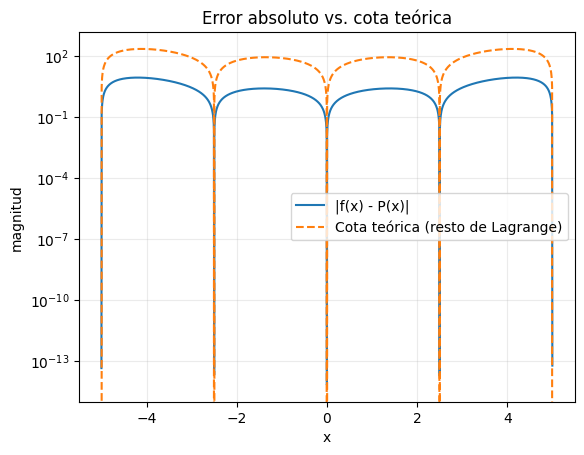

In [1]:
# Tarea 6.6 — Interpolación de f(x)=sinh(x) con 5 puntos equidistantes en [-5,5]
# Requisitos: numpy, matplotlib
import numpy as np
import math
import matplotlib.pyplot as plt

# --- [1] Datos del problema ---
f = np.sinh                     # funcion a interpolar
a, b = -5.0, 5.0               # intervalo
npts = 5                       # 5 puntos equidistantes -> polinomio de grado 4

# Nodos equidistantes
xk = np.linspace(a, b, npts)
yk = f(xk)

# --- [2] Polinomio  en forma expandida ---
# Con n puntos y grado n-1, np.polyfit interpola exactamente.
coef = np.polyfit(xk, yk, npts-1)     # coef[0] x^4 + ... + coef[4]
# Evaluador
def P(x):
    return np.polyval(coef, x)

# --- [3] Mallado fino para graficar y medir error ---
xx = np.linspace(a, b, 2001)
ff = f(xx)
PP = P(xx)
err_abs = np.abs(ff - PP)

# --- [4] Estimación/cota del error (resto de Lagrange) ---
# R4(x) = f^{(5)}(ξ_x) * ω5(x) / 5!
# Para f(x)=sinh(x): f^{(5)}(x) = cosh(x). Entonces M = max_{[-5,5]} cosh(x) = cosh(5).
M = math.cosh(5.0)
fact = math.factorial(5)  # 120

# ω5(x) = ∏_{k=1..5} (x - xk)
omega = np.ones_like(xx)
for xi in xk:
    omega *= (xx - xi)

err_bound = (M / fact) * np.abs(omega)   # cota teórica punto a punto

# --- [5] Resumen en consola ---
print("Coeficientes de P(x) (potencias descendentes):")
for i, c in enumerate(coef):
    pow_ = (npts-1)-i
    print(f"   x^{pow_:>1}: {c:.12f}")
print("\nPolinomio aproximado:  P(x) ≈ "
      f"{coef[0]:.9f} x^4 + {coef[1]:.9f} x^3 + {coef[2]:.9f} x^2 + {coef[3]:.9f} x + {coef[4]:.9f}")
print(f"\n||f - P||_∞ en la malla: {np.max(err_abs):.6e}")

# --- [6] Gráficos ---
plt.figure()
plt.plot(xx, ff, label='f(x) = sinh(x)')
plt.plot(xx, PP, '--', label='Interpolante P(x) (grado 4)')
plt.scatter(xk, yk, zorder=3, label='Nodos')
plt.title('Interpolación con 5 nodos equidistantes en [-5,5]')
plt.xlabel('x'); plt.ylabel('valor')
plt.legend(); plt.grid(True, alpha=0.25)

plt.figure()
plt.plot(xx, err_abs, label='|f(x) - P(x)|')
plt.plot(xx, err_bound, '--', label='Cota teórica (resto de Lagrange)')
plt.title('Error absoluto vs. cota teórica')
plt.xlabel('x'); plt.ylabel('magnitud')
plt.yscale('log')   # útil porque el rango puede ser amplio
plt.legend(); plt.grid(True, which='both', alpha=0.25)

plt.show()
